In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [31]:
df = pd.read_csv('https://drive.google.com/uc?id=12uz0bvlQuO9rn6HwDAs4DdgCy5-JFFoR&export=download')



print(df.head())

  Status  Duration history Purpose  amount Savings employment  Installment  \
0    A11         6     A34     A43    1169     A65        A75            4   
1    A12        48     A32     A43    5951     A61        A73            2   
2    A14        12     A34     A46    2096     A61        A74            2   
3    A11        42     A32     A42    7882     A61        A74            2   
4    A11        24     A33     A40    4870     A61        A73            3   

   sex guarantors  ...  Property Age  OtherInstallment Housing  \
0  A93       A101  ...      A121  67              A143    A152   
1  A92       A101  ...      A121  22              A143    A152   
2  A93       A101  ...      A121  49              A143    A152   
3  A93       A103  ...      A122  45              A143    A153   
4  A93       A101  ...      A124  53              A143    A153   

  ExistingCredits   Job liable  Telephone foreign Approved  
0               2  A173      1       A192    A201      Yes  
1           

In [32]:
# Extract features and target variable
X = df.copy()  # Features
y = df.iloc[:, -1]   # Target variable

print(X.head())


  Status  Duration history Purpose  amount Savings employment  Installment  \
0    A11         6     A34     A43    1169     A65        A75            4   
1    A12        48     A32     A43    5951     A61        A73            2   
2    A14        12     A34     A46    2096     A61        A74            2   
3    A11        42     A32     A42    7882     A61        A74            2   
4    A11        24     A33     A40    4870     A61        A73            3   

   sex guarantors  ...  Property Age  OtherInstallment Housing  \
0  A93       A101  ...      A121  67              A143    A152   
1  A92       A101  ...      A121  22              A143    A152   
2  A93       A101  ...      A121  49              A143    A152   
3  A93       A103  ...      A122  45              A143    A153   
4  A93       A101  ...      A124  53              A143    A153   

  ExistingCredits   Job liable  Telephone foreign Approved  
0               2  A173      1       A192    A201      Yes  
1           

In [33]:
# One-hot encode categorical features
categorical_features = ['Status','Duration','history','Purpose','amount','Savings','employment','Installment','sex','guarantors','residence','Property','Age','OtherInstallment','Housing','ExistingCredits','Job','liable','Telephone','foreign','Approved']

X_encoded = pd.get_dummies(X, columns=categorical_features)


In [34]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Build confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 59   0]
 [  0 141]]


In [37]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00


In [38]:
# Display the Decision Tree rules
tree_rules = export_text(clf, feature_names=list(X_encoded.columns))
print(tree_rules)

|--- Approved_Yes <= 0.50
|   |--- class: No
|--- Approved_Yes >  0.50
|   |--- class: Yes



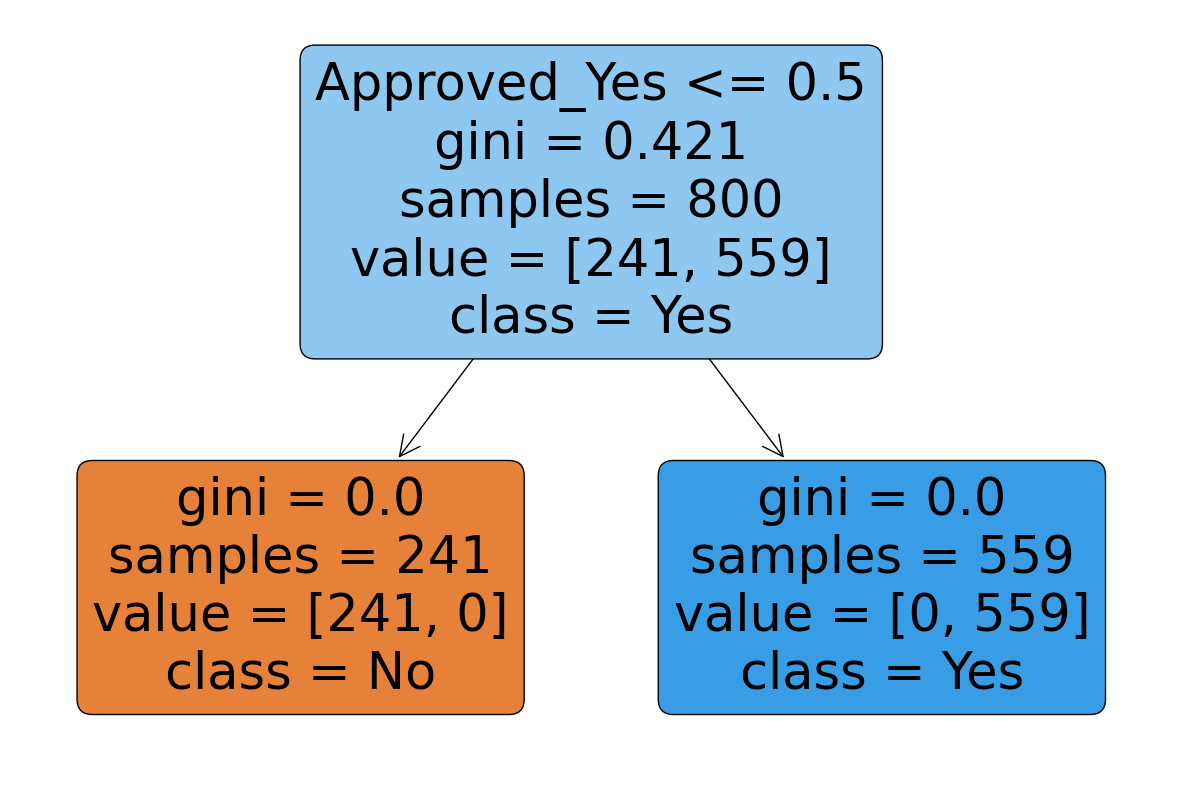

In [39]:
from sklearn import tree
# Save the tree plot as an image
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X_encoded.columns.tolist(), class_names=['No', 'Yes'], rounded=True)
plt.savefig('decision_tree.png')